In [ ]:
!mamba install famsa t-coffee mmseqs2 -y -q

In [1]:
from learnMSA.msa_hmm import Configuration, Align, Visualize

2023-08-16 14:59:54.898668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 14:59:54.990178: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-16 14:59:55.342258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/beckerf/mambaforge/envs/learnMSAdev/lib/:/lib:
2023-08-16 14:59:55.342474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: l

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 10

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
alignment_model = Align.run_learnMSA(train_filename,
                                    out_filename,
                                    config, 
                                    sequence_weights=Align.compute_sequence_weights(train_filename, "tmp") if use_weights else None,
                                    verbose=True,
                                    align_insertions=align_insertions)

Training of 10 models on file egf.fasta
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=100

2023-08-16 15:00:45.107996: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x5605260784d0
2023-08-16 15:00:45.459886: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x560509682230


10/10 - 45s - loss: 128.7592 - loglik: -9.7774e+01 - logprior: -3.0985e+01 - 45s/epoch - 4s/step
Epoch 2/10
10/10 - 1s - loss: 94.7253 - loglik: -8.5860e+01 - logprior: -8.8657e+00 - 1s/epoch - 103ms/step
Epoch 3/10
10/10 - 1s - loss: 80.6166 - loglik: -7.5951e+01 - logprior: -4.6655e+00 - 1s/epoch - 106ms/step
Epoch 4/10
10/10 - 1s - loss: 74.2677 - loglik: -7.0972e+01 - logprior: -3.2958e+00 - 1s/epoch - 103ms/step
Epoch 5/10
10/10 - 1s - loss: 71.7820 - loglik: -6.9115e+01 - logprior: -2.6673e+00 - 1s/epoch - 105ms/step
Epoch 6/10
10/10 - 1s - loss: 70.8317 - loglik: -6.8460e+01 - logprior: -2.3714e+00 - 1s/epoch - 101ms/step
Epoch 7/10
10/10 - 1s - loss: 70.2836 - loglik: -6.8069e+01 - logprior: -2.2150e+00 - 991ms/epoch - 99ms/step
Epoch 8/10
10/10 - 1s - loss: 70.0741 - loglik: -6.7979e+01 - logprior: -2.0946e+00 - 1s/epoch - 103ms/step
Epoch 9/10
10/10 - 1s - loss: 69.9812 - loglik: -6.7989e+01 - logprior: -1.9927e+00 - 1s/epoch - 106ms/step
Epoch 10/10
10/10 - 1s - loss: 69.761

2023-08-16 15:04:05.804976: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
FAMSA (Fast and Accurate Multiple Sequence Alignment) 
  version 2.2.2- (2022-10-09)
  S. Deorowicz, A. Debudaj-Grabysz, A. Gudys



Long insertions found at ins_0_12: 11.
Long insertions found at right_flank: 4.


Done!
FAMSA (Fast and Accurate Multiple Sequence Alignment) 
  version 2.2.2- (2022-10-09)
  S. Deorowicz, A. Debudaj-Grabysz, A. Gudys

Done!


time for generating output: 6.1271
Wrote file test/data/interactive.alignment.fasta


8/8 [==============================] - 1s 77ms/step
>l=-54.90_t=0.01
............$CD.....P........N............P........CYN.HG..T..C...S......................L......RA...T........G..........YTCSCL....PR......YT....GEH$.......................
>l=-57.14_t=0.01
............$CD.....S........Q............P........CRN.-G..T..Cs..L......................N......TN...T........D..........YTCACF....PG......YT....GRY$.......................
>l=-50.53_t=0.01
............$CD.....S........D............P........CLN.GG..T..C...T......................L......RSl..D........S..........YSCACA....PG......YT....GQH$.......................
>l=-63.71_t=0.01
............$CD.....H........V............T........CLN.GG..T..C...Q......................Lk.....TL...E........D..........YTCACA....NG......YT....GER$.......................
>l=-64.34_t=0.01
............$CD.....H........V............T........CLN.GG..T..C...Q......................Lk.....TL...E........E..........YTCACA....NG......YT....GDR$......................

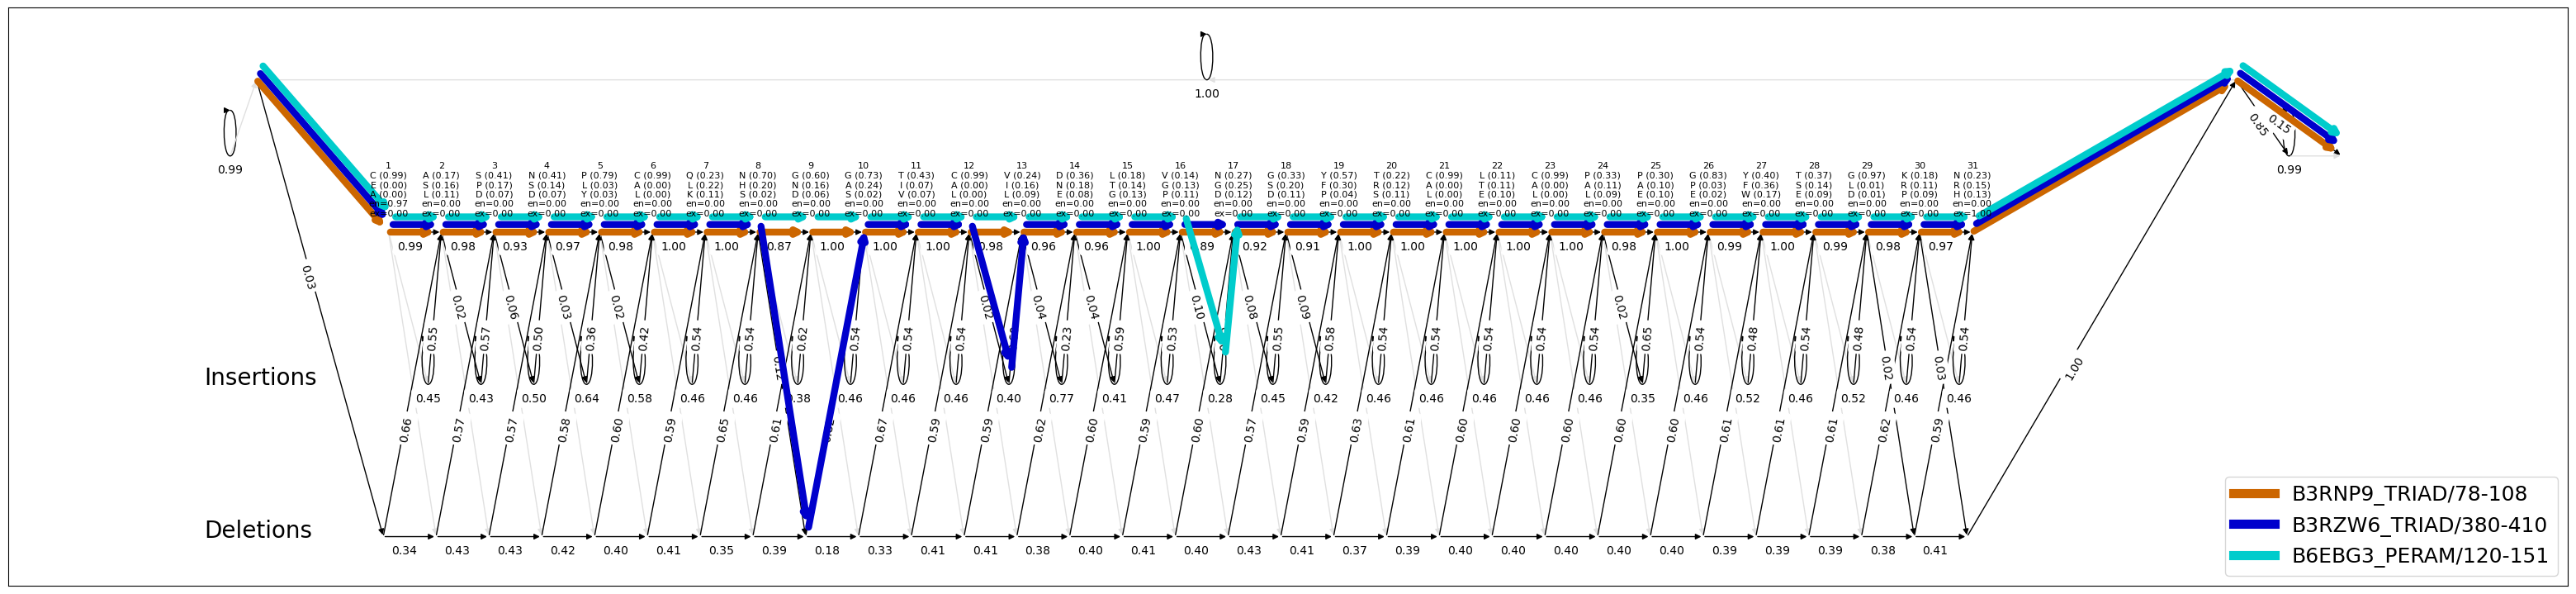

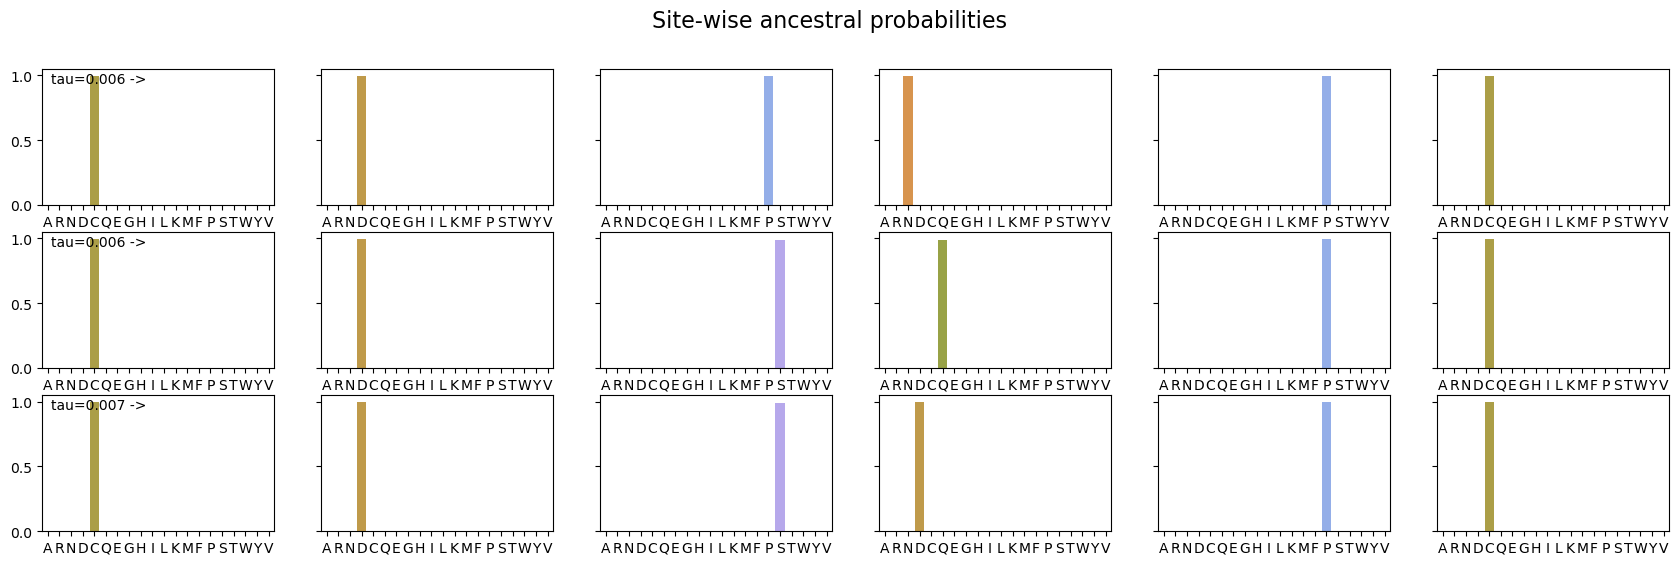

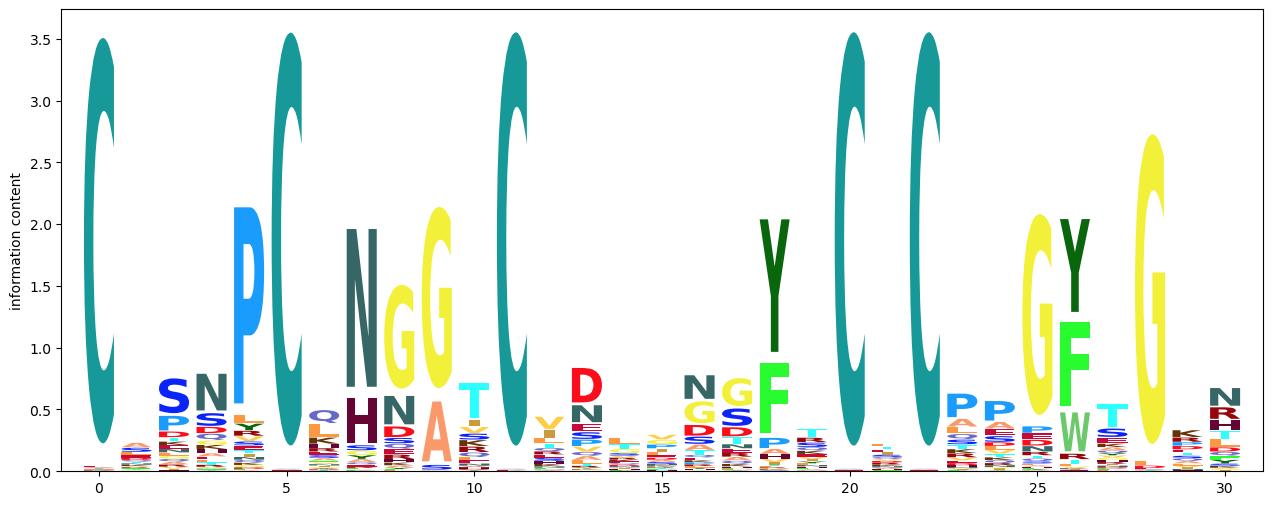

In [7]:
Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [1]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

sed: can't read {ref_filename}: No such file or directory
/bin/bash: line 1: ${{id_list[@]}}: bad substitution


In [6]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    77.8 [100.0]   [ 5182]
